In [2]:
import pandas as pd

In [3]:
rdir = ""
df = pd.read_csv(rdir+"eco2mix-regional-prepare.csv", parse_dates=['datetime'],  sep=";", index_col=0 )

In [63]:
df.columns

Index(['code_region', 'region', 'consommation', 'thermique', 'nucleaire',
       'eolien', 'solaire', 'hydraulique', 'pompage', 'bioenergies',
       'ech.physiques', 'tco_thermique', 'tch_thermique', 'tco_nucléaire',
       'tch_nucleaire', 'tco_eolien', 'tch_eolien', 'tco_solaire',
       'tch_solaire', 'tco_hydraulique', 'tch_hydraulique', 'tco_bioenergies',
       'tch_bioenergies', 'datetime', 'num_mois', 'annee', 'mois_sin',
       'mois_cos', 'jour_sin', 'jour_cos', 'saison', 'production_nette',
       'production_brute'],
      dtype='object')

In [64]:
import numpy as np

#### Analyse de l'évolution de la consommation moyenne au fil des années

In [65]:
conso_mean_2013 = df[df['datetime'].dt.year==2013]['consommation'].mean()
conso_mean_2013

4681.271110413456

In [66]:
conso_mean_2013 = np.round(conso_mean_2013)

In [67]:
consos_annee_2019 = df[df['datetime'].dt.year==2019]['consommation']
consos_annee_2019.mean()

4475.6200152207

In [68]:
from scipy.stats import ttest_1samp

In [69]:
S_echantillon, p_value = ttest_1samp(a=consos_annee_2019 , popmean=conso_mean_2013, alternative='greater')

print("Statistique S de l'echantillon:", S_echantillon, " P_value(S > S_ech) =", p_value)

Statistique S de l'echantillon: -44.36018760781741  P_value(S > S_ech) = 1.0


- Confirmation : l'hypothèse nulle est certaine : la moyenne n'a pas augmenté.

In [70]:
S_echantillon, p_value = ttest_1samp(a=consos_annee_2019 , popmean=conso_mean_2013, alternative='two-sided')

print("Statistique S de l'echantillon:", S_echantillon, " P_value(S != S_ech) =", p_value)

Statistique S de l'echantillon: -44.36018760781741  P_value(S != S_ech) = 0.0


 L'hypothese nulle (meme moyenne) est impossible:  La moyenne entre 2013 et 2019 n'est pas restée la meme

In [71]:
S_echantillon, p_value = ttest_1samp(a=consos_annee_2019 , popmean=conso_mean_2013, alternative='less')

print("Statistique S de l'echantillon:", S_echantillon, " P_value(S < S_ech) =", p_value)

Statistique S de l'echantillon: -44.36018760781741  P_value(S < S_ech) = 0.0


Impossible que la conso2013 ait une stat inferieure à celle de 2019 si celle de 2019 suit la loi de moyenne 2013.
- Donc la conso 2019 a une moyenne qui a probalement baissé par rapport à 2013.

### Analyse des correlations entre consommations et productions journalières par filière

In [72]:
import seaborn as sns

In [73]:
df_jours = df.groupby(by=[pd.Grouper(key='datetime', freq='D')]).agg({'consommation': sum, 'thermique': sum,
       'nucleaire': sum, 'eolien': sum, 'solaire': sum, 'hydraulique': sum })
df_jours.head(2)

,consommation,thermique,nucleaire,eolien,solaire,hydraulique
datetime,,,,,,
2013-01-01,2556595.0,172372.0,2323275.0,121486.0,5632.0,319876.0
2013-01-02,3095594.0,225174.0,2677237.0,67950.0,12613.0,421544.0


In [74]:
r, p_value = spearmanr(df_jours.iloc[:,0] , df_jours.iloc[:,1] )
print("Spearmanr product-moment correlation coefficient:", r, "\n probability of an uncorrelated (H0):",p_value)

Spearmanr product-moment correlation coefficient: 0.7853344901100634 
 probability of an uncorrelated (H0): 0.0


In [75]:
correlations = {}
for col in df_jours.columns.drop('consommation'):
    r, p_value = spearmanr(df_jours.loc[:,'consommation'] , df_jours.loc[:,col] )
    correlations[col] = r
correlations = pd.Series(correlations)

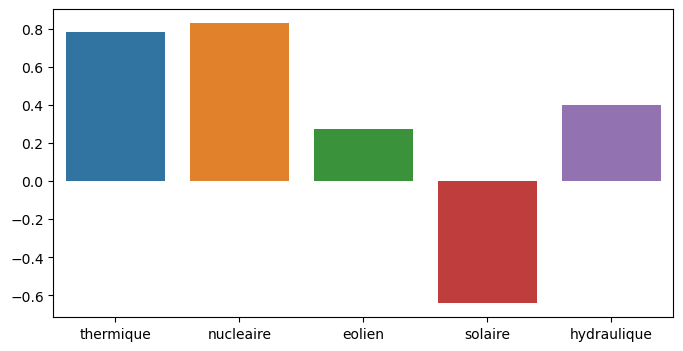

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.barplot(x=correlations.index, y=correlations.values);

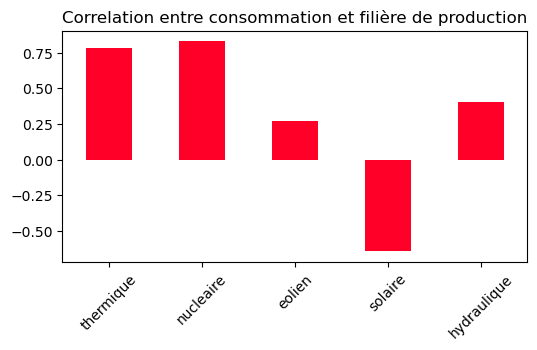

In [77]:
title = "Correlation entre consommation et filière de production"
correlations.plot(kind='bar', rot=45, colormap="gist_rainbow", figsize=(6,3), title=title);

### Analyse des correlations entre consommations et mois de l'année

In [78]:
df_mois = df.groupby(by=[pd.Grouper(key='datetime', freq='M')]).agg({'num_mois': lambda x : x.unique()[0] , 'consommation': sum})
df_mois.rename(columns={'consommation':'conso'}, inplace=True)
df_mois.head(20)

,num_mois,conso
datetime,,
2013-01-31,1,106515355.0
2013-02-28,2,98659091.0
2013-03-31,3,98492373.0
2013-04-30,4,80269032.0
2013-05-31,5,73323639.0
2013-06-30,6,65655313.0
2013-07-31,7,69091979.0
2013-08-31,8,62765320.0
2013-09-30,9,66050687.0


/Users/macbookpro/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 500x300 with 0 Axes>

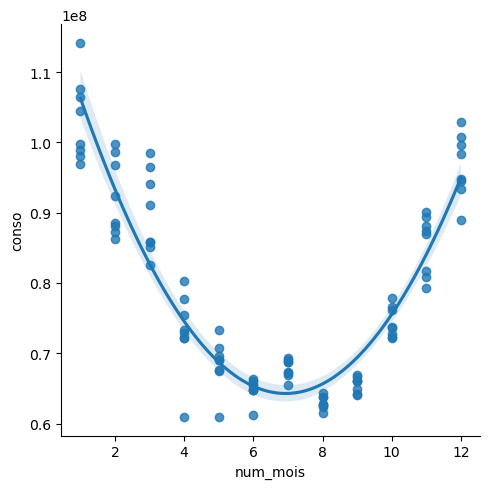

In [79]:
plt.figure(figsize=(5,3))
sns.lmplot(data=df_mois, x='num_mois', y='conso', order=2);

In [80]:
import statsmodels.api
model_de_regression = statsmodels.formula.api.ols('conso ~ num_mois', data=df_mois).fit()
statsmodels.api.stats.anova_lm(model_de_regression)

,df,sum_sq,mean_sq,F,PR(>F)
num_mois,1.0,1.205685e+15,1.205685e+15,6.487672,0.012486
Residual,94.0,1.746920e+16,1.858425e+14,NaN,NaN


### Analyse de la correlation entre production éolienne et mois de l'année

In [81]:
df_mois_prod_eolien = df.groupby(by=[pd.Grouper(key='datetime', freq='M')]).agg({'num_mois': lambda x : x.unique()[0] , 'eolien': sum})
df_mois_prod_eolien.rename(columns={'eolien':'eolien'}, inplace=True)
df_mois_prod_eolien.head(2)

,num_mois,eolien
datetime,,
2013-01-31,1,2627826.0
2013-02-28,2,2911326.0


In [82]:
import statsmodels.api
model_de_regression = statsmodels.formula.api.ols('eolien ~ num_mois', data=df_mois_prod_eolien).fit()
statsmodels.api.stats.anova_lm(model_de_regression)

,df,sum_sq,mean_sq,F,PR(>F)
num_mois,1.0,1.711838e+12,1.711838e+12,0.414791,0.521116
Residual,94.0,3.879367e+14,4.126986e+12,NaN,NaN


Eolien et mois de l'année probablement non correlés.

### Analyse de la température  en fonction de la période de l'année

In [83]:
rdir = ""
df_temperatures = pd.read_csv(rdir+"temperature-quotidienne-regionale.csv", parse_dates=['Date'],  sep=";", index_col=0 )
df_temperatures.rename(columns={'Code INSEE région': 'coderegion', 'TMin (°C)': 'TMin','TMax (°C)':'TMax','TMoy (°C)':'TMoy'}, inplace=True)

In [84]:
df_temperatures.head()

,Date,coderegion,Région,TMin,TMax,TMoy
ID,,,,,,
2020-08-13T00:00:00-52,2020-08-13,52,Pays de la Loire,19.25,25.35,22.30
2020-08-13T00:00:00-76,2020-08-13,76,Occitanie,17.51,26.55,22.03
2020-08-14T00:00:00-52,2020-08-14,52,Pays de la Loire,17.70,25.70,21.70
2020-08-14T00:00:00-32,2020-08-14,32,Hauts-de-France,18.92,23.40,21.16
2020-08-14T00:00:00-28,2020-08-14,28,Normandie,17.64,22.90,20.27


In [85]:
df_temperatures.dtypes

Date          datetime64[ns]
coderegion             int64
Région                object
TMin                 float64
TMax                 float64
TMoy                 float64
dtype: object

In [86]:
df_temperatures_mois = df_temperatures.groupby(by=pd.Grouper(key='Date',freq='M')).agg({'Date': lambda d:d.unique()[0].month ,'TMin':np.mean,'TMax':np.mean})
df_temperatures_mois.rename(columns={'Date': 'num_mois'}, inplace=True)
df_temperatures_mois.head(3)

,num_mois,TMin,TMax
Date,,,
2016-01-31,1,3.545335,9.856179
2016-02-29,2,3.681512,10.416393
2016-03-31,3,3.328759,11.860993


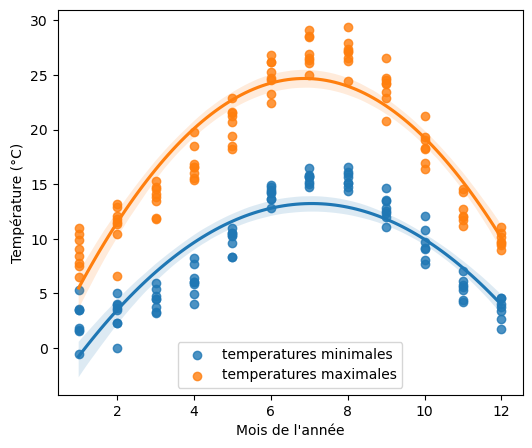

In [87]:
plt.figure(figsize=(6,5))
sns.regplot(data=df_temperatures_mois, x='num_mois', y='TMin',order=2, label='temperatures minimales');
sns.regplot(data=df_temperatures_mois, x='num_mois', y='TMax', order=2, label='temperatures maximales');
plt.ylabel('Température (°C)')
plt.xlabel("Mois de l'année")
plt.legend(loc='lower center')

### Analyse corrélation entre consommmation et température journalière

In [88]:
df_jour = df.groupby(by=[pd.Grouper(key='datetime', freq='D')]).agg({'datetime': lambda x : x.dt.date.unique()[0] , 'consommation': sum})
df_jour.rename(columns={'datetime':'Date', 'consommation':'conso'}, inplace=True)
df_jour = df_jour.reset_index().drop(columns='datetime')
df_jour.head()

,Date,conso
0,2013-01-01,2556595.0
1,2013-01-02,3095594.0
2,2013-01-03,3198764.0
3,2013-01-04,3131399.0
4,2013-01-05,2886822.0


In [89]:
df_jour['Date'] = df_jour['Date'].astype('datetime64[ns]')
df_jour.dtypes

Date     datetime64[ns]
conso           float64
dtype: object

In [90]:
df_temperatures.dtypes

Date          datetime64[ns]
coderegion             int64
Région                object
TMin                 float64
TMax                 float64
TMoy                 float64
dtype: object

In [91]:
df_temperatures.Date.dt.date.unique()

array([datetime.date(2020, 8, 13), datetime.date(2020, 8, 14),
       datetime.date(2020, 8, 15), ..., datetime.date(2023, 9, 29),
       datetime.date(2023, 9, 30), datetime.date(2023, 9, 7)],
      dtype=object)

In [92]:
df_temperatures_moyenne_nationale = df_temperatures.groupby(by=pd.Grouper(key='Date',freq='D')).\
agg({ 'TMin':np.mean,'TMax':np.mean})
df_temperatures_moyenne_nationale = df_temperatures_moyenne_nationale.reset_index()
df_temperatures_moyenne_nationale

,Date,TMin,TMax
0,2016-01-01,3.622308,10.899231
1,2016-01-02,6.862308,10.932308
2,2016-01-03,5.075385,9.722308
3,2016-01-04,5.839231,10.772308
4,2016-01-05,5.398462,9.999231
...,...,...,...
2825,2023-09-26,11.720000,25.556923
2826,2023-09-27,12.023077,26.256154
2827,2023-09-28,13.806923,25.350769
2828,2023-09-29,14.966154,23.870000


In [93]:
df_jour_temp = df_jour.merge(right=df_temperatures, how='inner', on='Date')
df_jour_temp.head()

,Date,conso,coderegion,Région,TMin,TMax,TMoy
0,2016-01-01,2581916.0,84,Auvergne-Rhône-Alpes,2.96,10.56,6.76
1,2016-01-01,2581916.0,76,Occitanie,4.54,13.34,8.94
2,2016-01-01,2581916.0,28,Normandie,2.78,9.40,6.09
3,2016-01-01,2581916.0,53,Bretagne,3.00,12.27,7.64
4,2016-01-01,2581916.0,27,Bourgogne-Franche-Comté,2.22,9.52,5.87


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,3))
sns.regplot(data=df_jour_temp, x='TMin', y='conso');

NameError: name 'df_jour_temp' is not defined

<Figure size 500x300 with 0 Axes>

In [95]:
from scipy.stats import spearmanr
r, p_value = spearmanr(df_jour_temp['TMin'] , df_jour_temp['conso'] )
print("Spearmanr product-moment correlation coefficient:", r, "\n probability of an uncorrelated (H0):",p_value)

Spearmanr product-moment correlation coefficient: -0.742589584542253 
 probability of an uncorrelated (H0): 0.0


/Users/macbookpro/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


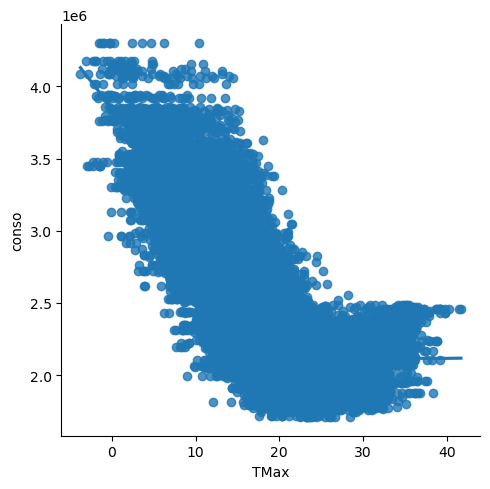

In [96]:
sns.lmplot(data=df_jour_temp, x='TMax', y='conso', lowess=True);

## Description statistique des données

In [97]:
df.describe()

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1683060 entries, 12 to 1683071
Data columns (total 33 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   code_region       1683060 non-null  int64         
 1   region            1683060 non-null  object        
 2   consommation      1683060 non-null  float64       
 3   thermique         1683060 non-null  float64       
 4   nucleaire         981785 non-null   float64       
 5   eolien            1682964 non-null  float64       
 6   solaire           1683060 non-null  float64       
 7   hydraulique       1683060 non-null  float64       
 8   pompage           946745 non-null   float64       
 9   bioenergies       1683060 non-null  float64       
 10  ech.physiques     1683060 non-null  float64       
 11  tco_thermique     210816 non-null   float64       
 12  tch_thermique     210816 non-null   float64       
 13  tco_nucléaire     122976 non-null   float64   

In [14]:
dfx = df
dfx = dfx.iloc[:, 2:11]
dfx.head()

,consommation,thermique,nucleaire,eolien,solaire,hydraulique,pompage,bioenergies,ech.physiques
12,3595.0,127.0,NaN,182.0,0.0,0.0,NaN,32.0,3252.0
13,9134.0,685.0,NaN,16.0,0.0,0.0,NaN,142.0,8289.0
14,2476.0,90.0,9085.0,508.0,0.0,34.0,NaN,25.0,-7267.0
15,4943.0,319.0,9137.0,1109.0,0.0,1418.0,0.0,57.0,-7102.0
16,2357.0,236.0,NaN,106.0,0.0,105.0,0.0,12.0,1894.0


In [98]:



df = df.drop(df.columns[[11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]],axis =1)
df.describe()

,code_region,consommation,thermique,nucleaire,eolien,solaire,hydraulique,pompage,bioenergies,ech.physiques,production_brute
count,1.683060e+06,1.683060e+06,1.683060e+06,981785.00000,1.682964e+06,1.683060e+06,1.683060e+06,946745.000000,1.683060e+06,1.683060e+06,1.683060e+06
mean,4.991667e+01,4.491236e+03,3.742477e+02,6326.01627,2.384455e+02,8.319757e+01,6.042936e+02,-118.431811,8.148997e+01,-5.143107e+02,4.490907e+03
std,2.564001e+01,2.173764e+03,5.407114e+02,3053.77645,3.992384e+02,2.027177e+02,1.033438e+03,316.984291,4.493691e+01,4.384275e+03,2.173696e+03
min,1.100000e+01,8.950000e+02,-8.300000e+01,-144.00000,-6.000000e+00,-2.300000e+01,-6.000000e+00,-2570.000000,4.000000e+00,-1.221900e+04,8.950000e+02
25%,2.775000e+01,2.782000e+03,2.400000e+01,3642.00000,2.500000e+01,0.000000e+00,4.000000e+00,-16.000000,4.600000e+01,-4.285000e+03,2.781000e+03
50%,4.800000e+01,4.103000e+03,1.510000e+02,6267.00000,9.800000e+01,0.000000e+00,5.600000e+01,0.000000,7.100000e+01,5.030000e+02,4.103000e+03
75%,7.525000e+01,5.734000e+03,4.780000e+02,8834.00000,2.790000e+02,6.100000e+01,8.920000e+02,0.000000,1.140000e+02,2.230000e+03,5.733000e+03
max,9.300000e+01,1.533800e+04,4.293000e+03,13632.00000,4.351000e+03,2.224000e+03,8.388000e+03,0.000000,5.480000e+02,1.395900e+04,1.533700e+04


## Réalisation de la heatmap entre la consommation et les principales filières de production

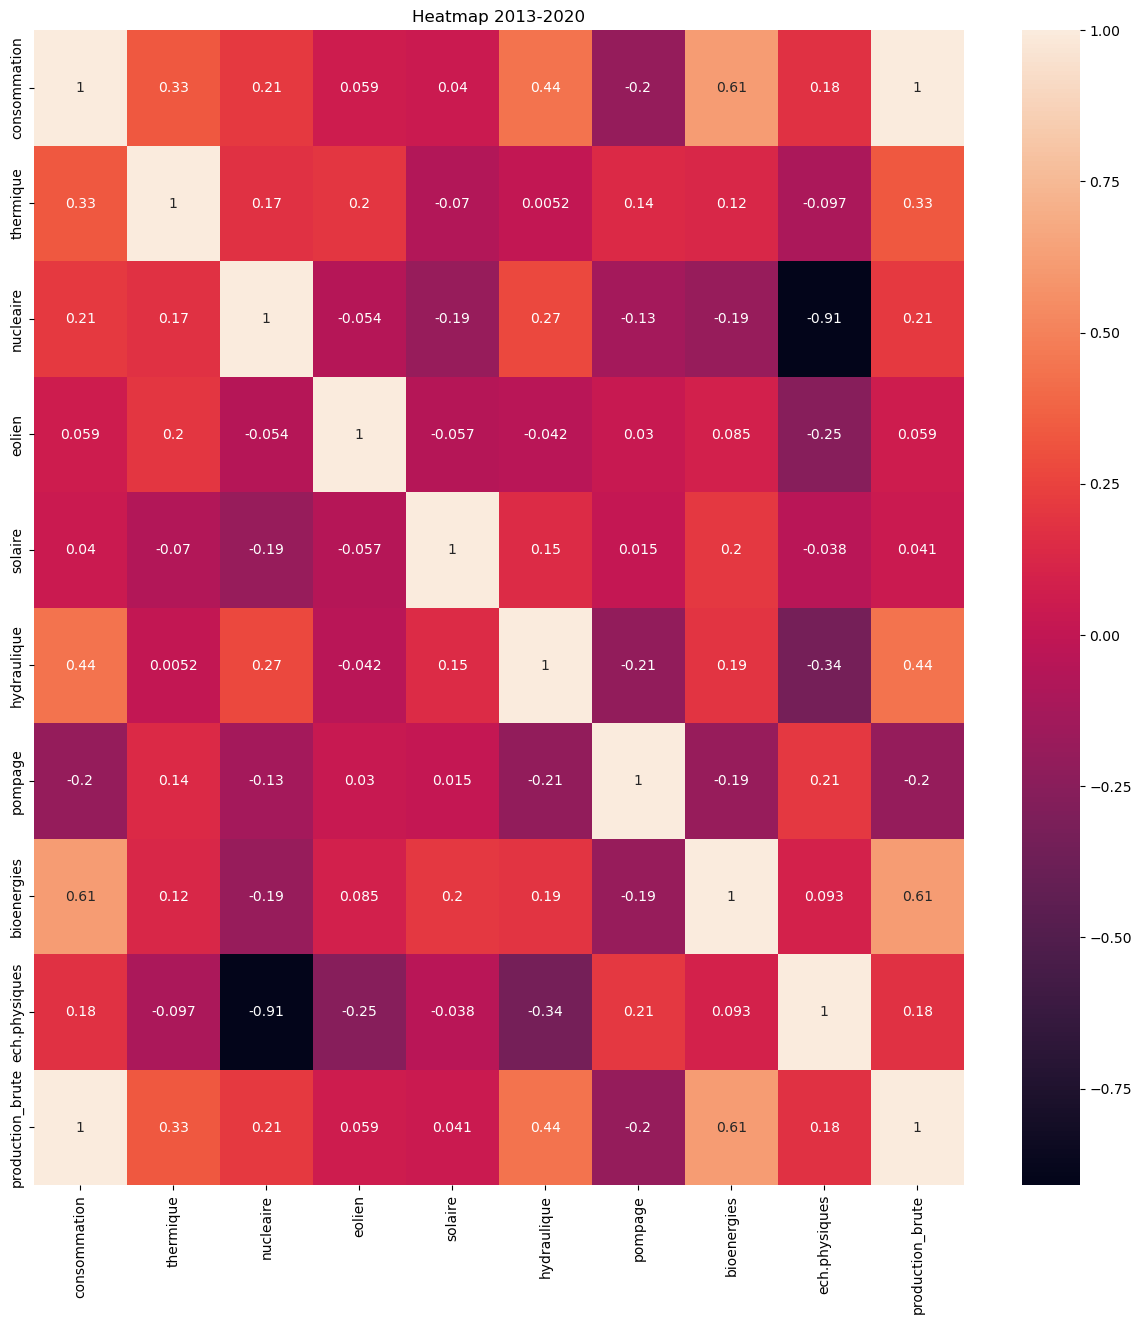

In [99]:
df_num = df.select_dtypes('float')

fig, ax = plt.subplots(figsize=(15,15))

sns.heatmap(df_num.corr(), ax = ax, annot = True)

plt.title('Heatmap 2013-2020');

## Histogramme de répartition des différentes filières de production

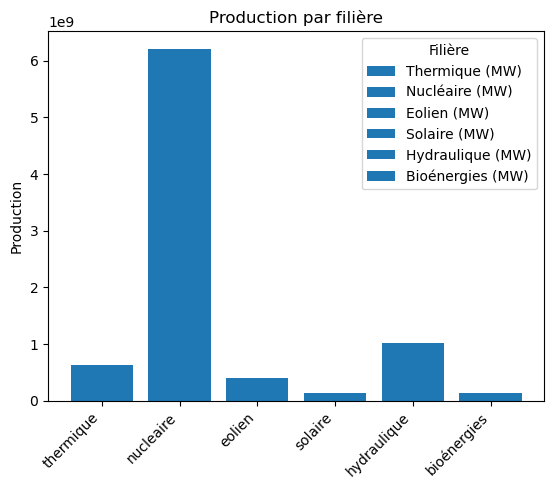

In [6]:
df_prod = df.groupby(by=['region']).agg({'thermique': sum,'nucleaire' : sum,'eolien' : sum,\
                                        'solaire': sum,'hydraulique' : sum,'pompage': sum,\
                                         'bioenergies' : sum,'ech.physiques':sum })

df_prod

df_prod_tot = df_prod.sum()

df_prod_tot2 = df_prod_tot.drop("pompage",axis = 0)
df_prod_tot3 = df_prod_tot2.drop("ech.physiques",axis = 0)

df_prod_tot3

fig, ax = plt.subplots()

energy = ['thermique','nucleaire','eolien', 'solaire','hydraulique','bioénergies']
counts = df_prod_tot3
bar_labels = ['Thermique (MW)','Nucléaire (MW)','Eolien (MW)', 'Solaire (MW)','Hydraulique (MW)','Bioénergies (MW)']
# bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(energy, counts, label=bar_labels)

ax.set_ylabel('Production')
ax.set_title('Production par filière')
ax.legend(title='Filière')
plt.xticks(rotation=45, ha='right')
plt.show();

In [10]:
counts = df_prod_tot3.to_list()
display(counts)
df_prod_tot3

[629881406.0,
 6210787884.0,
 401295160.0,
 140026503.0,
 1017062304.0,
 137152502.0]

thermique      6.298814e+08
nucleaire      6.210788e+09
eolien         4.012952e+08
solaire        1.400265e+08
hydraulique    1.017062e+09
bioenergies    1.371525e+08
dtype: float64

## Analyse de l'évolution mensuelle de la consommation et des productions

NameError: name 'plt' is not defined

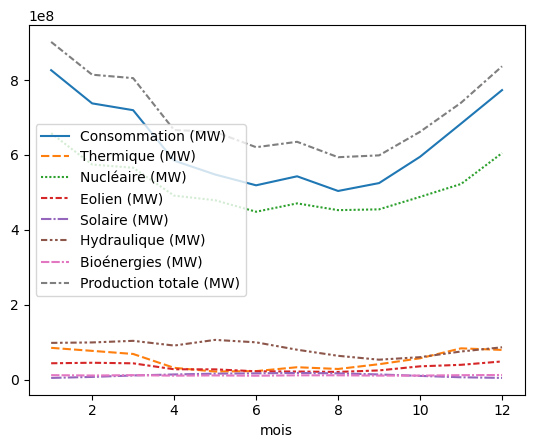

In [3]:
import pandas as pd
import seaborn as sns

#Création d'un df avec les consommations et productions par filière mensuelles

dfx = pd.read_csv('eco2mix-regional-cons-def.csv', sep=";", index_col=0)


dfx['annee']=dfx['Date'].str[:4].astype('int')
dfx['Date']=pd.to_datetime(dfx['Date'])
dfx['mois']= dfx['Date'].dt.month      # Consommation par mois


prod_conso_mois = dfx.groupby("mois",'annee' == 2020).agg({'Consommation (MW)':'sum','Thermique (MW)' : "sum",'Nucléaire (MW)': "sum",'Eolien (MW)': "sum",\
                                   'Solaire (MW)': "sum",'Hydraulique (MW)':"sum", \
                                  'Bioénergies (MW)':"sum" })

# prod_conso_mois
# Calcul de la production totale

prod_tot = prod_conso_mois.drop('Consommation (MW)',axis = 1).sum(axis = 1)

df_prod_tot = pd.DataFrame(prod_tot) # Attention modifier nom de la colonne en vue du graphique

# df_prod_tot

consol = prod_conso_mois.merge(df_prod_tot, on = 'mois', how = 'left')

consol = consol.rename({0 : 'Production totale (MW)'}, axis = 1)

#consol

#Création du graphique en courbe
sns.lineplot(data=(consol))
plt.title("Evolution mensuelle de la consommation et de la production en 2020 (MW)")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));